In [1]:
import pandas as pd

# File path
file_path = '/home/marshal/protonotebook/Data Mining/Nature-language/Industrial_and_Scientific_5.json'

# Read JSON file into DataFrame
data = pd.read_json(file_path, lines=True)
data.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"11 27, 2017",A1JB7HFWHRYHT7,B0000223SI,{'Size:': ' 1-(Pack)'},Alex W.,This worked really well for what I used it for...,Couldn't have been happier with it's performance,1511740800,NaN,NaN
1,5,True,"11 4, 2017",A2FCLJG5GV8SD6,B0000223SI,{'Size:': ' 1-(Pack)'},Randall Harris,Fast cutting and good adheasive.,Good paper.,1509753600,NaN,NaN
2,5,False,"10 27, 2017",A3IT9B33NWYQSL,B0000223SI,{'Size:': ' 1-(Pack)'},A. C.,Worked great for my lapping bench. I would li...,Handy!,1509062400,NaN,NaN
3,4,True,"01 13, 2018",AUL5LCV4TT73P,B0000223SK,{'Size:': ' 1-Pack'},TnT,As advertised,As advertised,1515801600,NaN,NaN
4,5,True,"10 7, 2017",A1V3I3L5JKO7TM,B0000223SK,{'Size:': ' 1-Pack'},John Jones,seems like a pretty good value as opposed to b...,seems like a pretty good value as opposed to b...,1507334400,NaN,NaN


In [3]:
review_data = data[['overall','verified','reviewerID','asin','reviewText','summary']]
review_data

,overall,verified,reviewerID,asin,reviewText,summary
0,5,True,A1JB7HFWHRYHT7,B0000223SI,This worked really well for what I used it for...,Couldn't have been happier with it's performance
1,5,True,A2FCLJG5GV8SD6,B0000223SI,Fast cutting and good adheasive.,Good paper.
2,5,False,A3IT9B33NWYQSL,B0000223SI,Worked great for my lapping bench. I would li...,Handy!
3,4,True,AUL5LCV4TT73P,B0000223SK,As advertised,As advertised
4,5,True,A1V3I3L5JKO7TM,B0000223SK,seems like a pretty good value as opposed to b...,seems like a pretty good value as opposed to b...
...,...,...,...,...,...,...
77066,5,True,A1UZ9AVZFWZS1A,B01HCVJ3K2,So far it has worked like a champ. Great solut...,I recommend it.
77067,5,True,A1PMSQXD43WIS4,B01HCVJ3K2,Great quality solid state relay. I used this s...,Great quality solid state relay
77068,5,True,A225WHD7XZVIXL,B01HEQVQAK,Came with everything needed to install in my M...,Exactly as described
77069,5,True,A3T05FOORNQI18,B01HEQVQAK,Installed a month ago in my Monoprice Maker Se...,Works Great


## Filtering verified reviews

In [4]:
print(review_data.verified.value_counts(normalize=True))

verified
True     0.920268
False    0.079732
Name: proportion, dtype: float64


In [5]:
verified_reviews = review_data[review_data.verified == True].copy()

In [6]:
print(verified_reviews.verified.value_counts(normalize=True))

verified
True    1.0
Name: proportion, dtype: float64


Only Verified reviews

## Duplicate column

### Part 1: 

The important columns to keep are:

1. overall: This is the sentiment value
2. reviewText: This is the raw review
3. summary: Summary of the review
4. reviewerID: This is the ID of the reviewer. In itselt, it is not useful but for further processing.

In [8]:
duplicates = verified_reviews[verified_reviews.duplicated(keep=False)]
duplicates.head()

,overall,verified,reviewerID,asin,reviewText,summary
509,5,True,A2ASSXGZKCG0N2,B00004TBJD,ok,Five Stars
510,5,True,A2ASSXGZKCG0N2,B00004TBJD,ok,Five Stars
1135,5,True,A31B6K9H98GZMO,B00004Z2HN,happy,Five Stars
1136,5,True,A31B6K9H98GZMO,B00004Z2HN,happy,Five Stars
1773,5,True,A1PNDS8INRDCOP,B0000DD1EJ,great value,Five Stars


### reviewerID & asin shows duplicate of same review

In [9]:
verified_reviews.drop_duplicates(['reviewerID', 'asin'], keep='first', inplace=True)

In [10]:
verified_reviews.shape

(66332, 6)

### Observation
#### Reviews with same overall & reviewText
#### Reviews with Different overall & same reviewText

In [32]:
filtered_reviews=verified_reviews[(verified_reviews.reviewText == 'good')]
filtered_reviews

,overall,verified,reviewerID,asin,reviewText,summary
183,5,True,A2RSQJ5HXATAPH,B00002NC3K,good,Five Stars
209,5,True,A16KTYV908RXS8,B00002ND6L,good,Five Stars
475,5,True,A2YD6BB1IPQFPU,B00004T7W2,good,Five Stars
504,4,True,A1BT9J2I6DC246,B00004TBJD,good,Four Stars
520,5,True,A1FDA3DSUYRH0F,B00004TBJD,good,Five Stars
...,...,...,...,...,...,...
76035,5,True,A20TQS4J96VWBE,B015K4DKNY,good,Five Stars
76170,5,True,A20TQS4J96VWBE,B017CN9D1E,good,Five Stars
76578,5,True,AB03CF1FOX4XQ,B01C3EFUF0,good,Five Stars
76630,4,True,AQYY3BERPWKB2,B01CFJES9W,good,Four Stars


#### This show one Review with different unique overall and Same reviewText

In [31]:
unique_overall_values = filtered_reviews['overall'].unique()
unique_overall_values

array([5, 4, 3, 2])

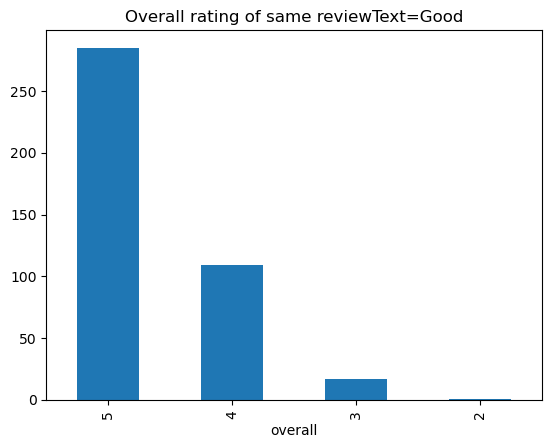

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
filtered_reviews.overall.value_counts().plot(kind='bar', title='Overall rating of same reviewText=Good')
plt.show()

### This plot shows the same reviewText example with different overall rating